# Tutorial about clustering LocData

Surepy provides methods for clustering localizations in LocData objects. The methods all return a new LocDat object that represents the collected selections for each cluster.

## Setting things up

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import surepy as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Surepy:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Simulate localization data that follows a Neyman-Scott distribution in 2D

In [3]:
locdata = sp.simulate_Thomas(n_samples=1000, n_features=2, centers=10, feature_range=(0, 1000), cluster_std=10, seed=0)

locdata.print_summary()

identifier: "1"
comment: ""
creation_date: "2021-03-04 13:46:25 +0100"
modification_date: ""
source: SIMULATION
state: RAW
element_count: 1000
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""



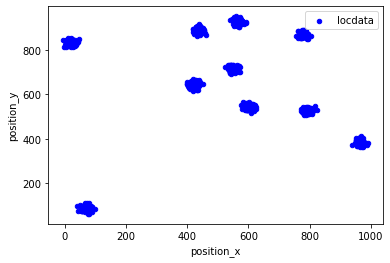

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

## Cluster localizations by hdbscan

In [5]:
noise, clust = sp.cluster_hdbscan(locdata, min_cluster_size = 5, allow_single_cluster = False)

assert noise is None
clust.print_meta()

identifier: "12"
creation_date: "2021-03-04 13:46:26 +0100"
source: DESIGN
state: RAW
history {
  name: "cluster_hdbscan"
  parameter: "{\'min_cluster_size\': 5, \'loc_properties\': None, \'allow_single_cluster\': False, \'kwargs\': {}, \'locdata\': <surepy.data.locdata.LocData object at 0x00000152702020A0>}"
}
ancestor_identifiers: "2"
ancestor_identifiers: "3"
ancestor_identifiers: "4"
ancestor_identifiers: "5"
ancestor_identifiers: "6"
ancestor_identifiers: "7"
ancestor_identifiers: "8"
ancestor_identifiers: "9"
ancestor_identifiers: "10"
ancestor_identifiers: "11"
element_count: 10



### Show scatter plots

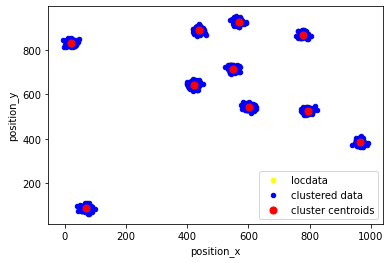

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
sp.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=50, label='cluster centroids')
plt.show()

## Cluster localizations in the presence of noise

Often homogeneously distributed localizations are present that cannot be clustered (so-called noise). In this case *noise* should be set True such that two LocData objects are returned that hold noise and the cluster collection. If *noise* is False it will be part of the returned cluster collection.

In [7]:
locdata_cluster = sp.simulate_Thomas(n_samples=1000, n_features=2, centers=10, feature_range=(0, 1000), cluster_std=10, seed=3)
locdata_noise = sp.simulate_csr(n_samples=100, feature_range=(0,1000), seed=3)
locdata = sp.LocData.concat([locdata_cluster, locdata_noise])

In [8]:
noise, clust = sp.cluster_hdbscan(locdata, min_cluster_size=20, allow_single_cluster=False)

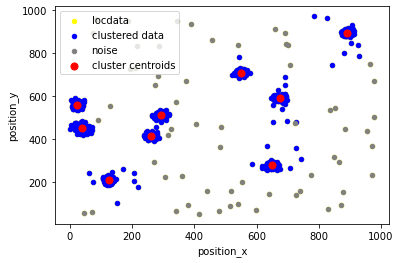

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
sp.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
noise.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Gray', label='noise')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=50, label='cluster centroids')
plt.show()

## Cluster localizations by dbscan

In [10]:
noise, clust = sp.cluster_dbscan(locdata, eps=20, min_samples=4)

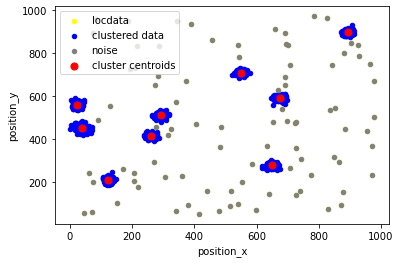

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
sp.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
noise.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Gray', label='noise')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=50, label='cluster centroids')
plt.show()

If single localizations should be inlcuded as individual clusters, we need to reduce `min_samples` to 1. In that case `noise` will always be None.

In [12]:
noise, clust = sp.cluster_dbscan(locdata, eps=20, min_samples=1)
assert noise is None

In [13]:
clust.data.head()

,localization_count,position_x,position_y,region_measure_bb,localization_density_bb,subregion_measure_bb
0,101,292.349070,510.327061,2991.217295,0.033766,218.770898
1,102,259.790296,414.794717,2316.226258,0.044037,192.508868
2,101,22.434061,557.178332,2260.760531,0.044675,192.618682
3,202,38.557264,450.245991,4633.074455,0.043600,272.741624
4,101,676.039010,590.907498,2658.498553,0.037991,206.264464


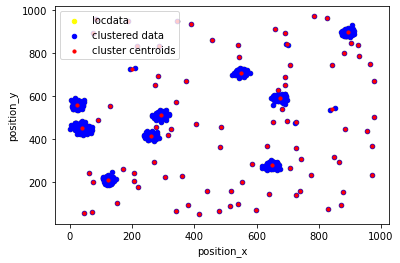

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata')
sp.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data')
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=10, label='cluster centroids')
plt.show()